### Plotting alignment data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
import math
import pandas as pd
import utils.db_utils as db
import utils.plot_utils as plot
import utils.file_utils as file
import config

############################################
# get configuration
cfg = config.getConfig() # configure values in config.js
############################################

targetLang = cfg['targetLang']
bibleType = cfg['targetBibleType']
tWordsTypeList = cfg['tWordsTypeList']
dbPath = cfg['dbPath']
trainingDataPath = cfg['trainingDataPath']
testamentStr = cfg['testamentStr']
baseDataPath = cfg['baseDataPath']

In [2]:
# get alignments for tWords

minAlignments = 20
remove = ['ὁ', 'τὸ', 'τὰ', 'αὐτός', 'λέγω', 'ὡς', 'μέν', 'εἷς']

alignmentsForWord, filteredAlignmentsForWord = db.fetchAlignmentDataForAllTWordsCached(trainingDataPath, bibleType, tWordsTypeList, minAlignments, remove)
print(f"Original Language Alignments: {len(filteredAlignmentsForWord)}")

Using cached Alignments
Unfiltered Alignments: 4368
filtered alignments by original list count is 243
Size of filtered alignments by original ./data/en/ult/TrainingData/kt_en_ult_NT_alignments_by_orig_20.json is 7.628 MB
Size of filtered alignments by original ./data/en/ult/TrainingData/kt_en_ult_NT_alignments_by_orig_20.csv is 2.076 MB
Filtered Alignments: 243
Using cached Alignments
Unfiltered Alignments: 538
filtered alignments by original list count is 33
Size of filtered alignments by original ./data/en/ult/TrainingData/names_en_ult_NT_alignments_by_orig_20.json is 1.298 MB
Size of filtered alignments by original ./data/en/ult/TrainingData/names_en_ult_NT_alignments_by_orig_20.csv is 0.363 MB
Filtered Alignments: 33
Using cached Alignments
Unfiltered Alignments: 7380
filtered alignments by original list count is 250
Size of filtered alignments by original ./data/en/ult/TrainingData/other_en_ult_NT_alignments_by_orig_20.json is 6.275 MB
Size of filtered alignments by original ./dat

### Analysis of alignments for tWords in the en_ult:

#### Frequency of alignments:
_***Note that each line on the graphs below represents an alignment for a specific word. For example we have separate lines for 'Θεός', 'Θεὸς', or 'Θεοῦ' even though they have the same lemma.  It made sense to group the alignments this way since aligners are likely to choose different target language words based on morphology of the word._

Plotting of 429 tWord Alignments


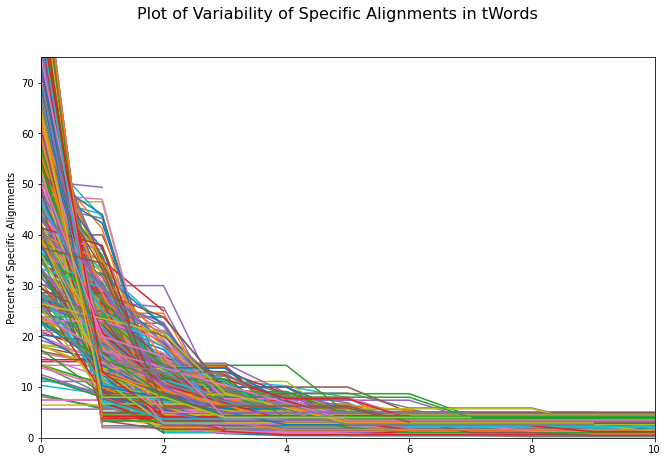

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,95.918367,2.040816,2.040816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77.777778,6.666667,4.444444,4.444444,2.222222,2.222222,2.222222,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68.292683,17.073171,4.878049,2.439024,2.439024,2.439024,2.439024,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97.826087,2.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.660377,5.660377,5.660377,5.660377,5.660377,3.773585,3.773585,3.773585,3.773585,1.886792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,45.000000,30.000000,10.000000,5.000000,5.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,37.500000,34.375000,6.250000,6.250000,6.250000,6.250000,3.125000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,52.000000,20.000000,16.000000,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,41.025641,15.384615,12.820513,12.820513,5.128205,2.564103,2.564103,2.564103,2.564103,2.564103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
frequenciesOfAlignments, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, 'alignmentText')

print(f"Plotting of {len(filteredAlignmentsForWord)} tWord Alignments")
title = f"Plot of Variability of Specific Alignments in tWords"
ylabel = "Percent of Specific Alignments"
xlimit = [0, 10]
ylimit = [0, 75]
outputTable = plot.plotFrequencies(frequenciesOfAlignments, title, ylabel, showXValues=False, xlimit=xlimit, ylimit=ylimit)
csvPath = "plotData_freqOfTWords.csv"
db.saveListToCSV(csvPath, outputTable)

In [4]:
print(f"Testing all tWords")
thresholds = {
    'alignmentOrigWordsThreshold': 3,
    'alignmentTargetWordsThreshold': 5,
    'origWordsBetweenThreshold': 1,
    'targetWordsBetweenThreshold': 1,
    'alignmentFrequencyMinThreshold': 5
}

type_ = 'all_twords'
warningData,summary = db.generateWarningsAndSummary(baseDataPath, type_, bibleType, testamentStr, filteredAlignmentsForWord,
                                                     thresholds, tag=f'{minAlignments}')
print(f"Found {len(warningData)} alignments to check - min threshold {minAlignments}")

frequencyWarnings = warningData[warningData['frequencyWarning'].str.len() > 0]
print (f"\nFound {len(frequencyWarnings)} frequencyWarnings")
frequencyWarningsByOrigWords = frequencyWarnings['originalWord'].value_counts()
print (f"FrequencyWarnings by original word:")
frequencyWarningsByOrigWords

Testing all tWords
saved summary of 429 original words to ./data/en/ult/all_twords_en_ult_NT_summary_20.csv
Found 1410 alignments to check - min threshold 20

Found 1148 frequencyWarnings
FrequencyWarnings by original word:


ἐγένετο       65
Θεοῦ          50
Ἰησοῦς        37
Χριστοῦ       33
Ἰησοῦ         31
              ..
Ἱεροσόλυμα     1
δαιμόνια       1
θρόνου         1
ἀδελφὸν        1
Χριστός        1
Name: originalWord, Length: 166, dtype: int64

In [5]:
frequencyWarningsByLemma = frequencyWarnings['lemma'].value_counts()
print (f"FrequencyWarnings by lemma:")
frequencyWarningsByLemma

FrequencyWarnings by lemma:


θεός          104
Ἰησοῦς         77
γίνομαι        65
ὁράω           50
ἡμέρα          45
             ... 
δαιμόνιον       1
θρόνος          1
βασιλεία        1
ἔρημος          1
Ἱεροσόλυμα      1
Name: lemma, Length: 96, dtype: int64

Found 27 original words with frequency warnings
Plotting of 27 tWord Alignments


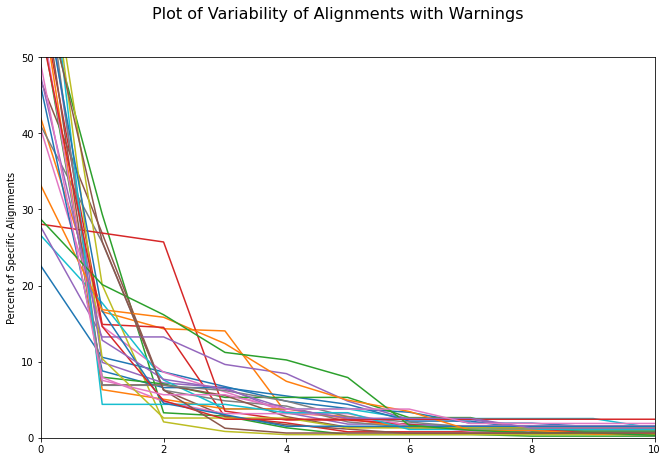

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,22.596154,10.576923,8.653846,6.730769,4.807692,3.846154,3.365385,1.923077,1.923077,1.442308,...,0.480769,0.480769,0.480769,0.480769,0.480769,0.480769,0.480769,0.480769,0.480769,0.480769
1,41.994382,16.573034,14.325843,14.044944,3.230337,2.808989,1.544944,1.123596,0.702247,0.561798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.210526,29.385965,3.289474,2.850877,1.315789,0.438596,0.438596,0.438596,0.219298,0.219298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57.647059,14.901961,14.509804,2.745098,1.960784,0.784314,0.784314,0.784314,0.784314,0.784314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63.663664,9.909910,7.207207,6.606607,3.303303,1.801802,1.801802,1.501502,0.600601,0.600601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,46.857143,26.857143,6.285714,2.857143,1.714286,1.142857,0.571429,0.571429,0.571429,0.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,40.517241,14.655172,8.620690,6.034483,3.448276,2.586207,1.724138,0.862069,0.862069,0.862069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40.972222,25.694444,6.250000,4.861111,4.166667,2.083333,1.388889,1.388889,1.388889,0.694444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,71.129707,20.083682,2.092050,0.836820,0.418410,0.418410,0.418410,0.418410,0.418410,0.418410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,26.582278,17.721519,7.594937,3.797468,3.797468,3.797468,2.531646,2.531646,2.531646,2.531646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
minNumberOfWarnings = 10
origWordsWithWarnings = []
for key in frequencyWarningsByOrigWords.keys():
    count = frequencyWarningsByOrigWords[key]
    if count > minNumberOfWarnings:
        origWordsWithWarnings.append(key)

warningsAlignments = {}
for word in origWordsWithWarnings:
    warningsAlignments[word] = filteredAlignmentsForWord[word]
print(f"Found {len(origWordsWithWarnings)} original words with frequency warnings")

frequenciesOfAlignments, stats = db.getFrequenciesOfFieldInAlignments(warningsAlignments, 'alignmentText')

print(f"Plotting of {len(warningsAlignments)} tWord Alignments")
title = f"Plot of Variability of Alignments with Warnings"
ylabel = "Percent of Specific Alignments"
xlimit = [0, 10]
outputTable = plot.plotFrequencies(frequenciesOfAlignments, title, ylabel, showXValues=False, xlimit=xlimit)
csvPath = f"plotData_freqOfTWords_minWarnings_{minNumberOfWarnings}.csv"
db.saveListToCSV(csvPath, outputTable)

### Analysis:

#### Analysis of numerical metrics:

#### Analysis of original language word count:

Found 429 original language words for tW type all


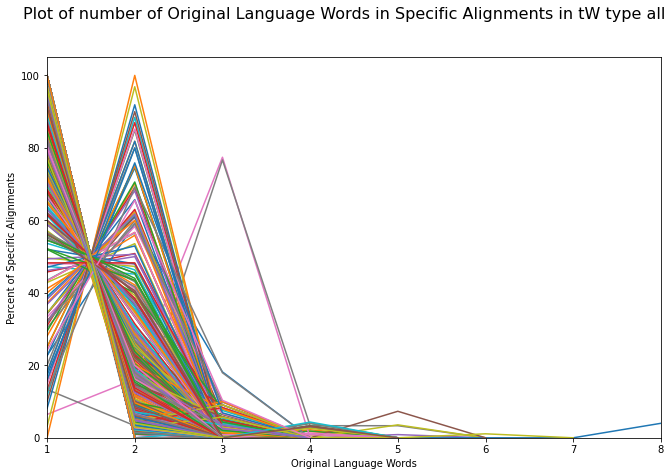

In [7]:
type_ = 'all'
field = 'origWordsCount'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

print(f"Found {len(field_frequencies)} original language words for tW type {type_}")
title = f"Plot of number of Original Language Words in Specific Alignments in tW type {type_}"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[1, 8])


##### Notes:
- this field analysis suggests that original word counts are tight - a threshold word count of 3 probably good for Greek to flag for review.
<p></p>

Out of 429, found 5 original language words that have instances with over 4 words


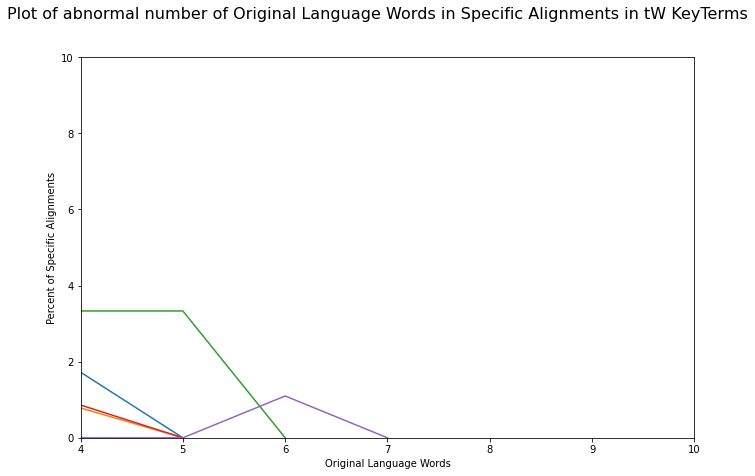

In [8]:
threshold = 4
abnormalAlignments = {}
for origWord in field_frequencies:
    frequency = field_frequencies[origWord]
    count = len(frequency)
    if count >= threshold:
        abnormalAlignments[origWord] = frequency

print(f"Out of {len(field_frequencies)}, found {len(abnormalAlignments)} original language words that have instances with over {threshold} words")
filledFrequencies = db.zeroFillFrequencies(abnormalAlignments)

title = f"Plot of abnormal number of Original Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[threshold, 10], ylimit=[0, 10])

#### Analysis of target language word count:

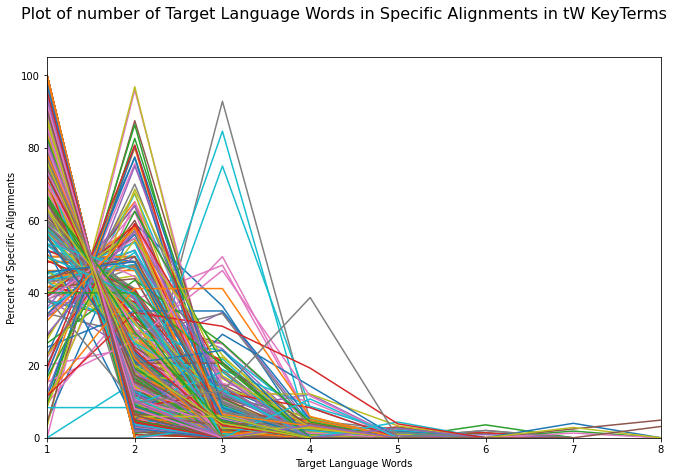

In [9]:
field = 'targetWordsCount'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Target Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Target Language Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[1, 8])

##### Notes:
- this field analysis suggests that a threshold word count of 3 probably good for English to flag for review.
<p></p>

#### Analysis of count of extra unaligned words between aligned original language words:

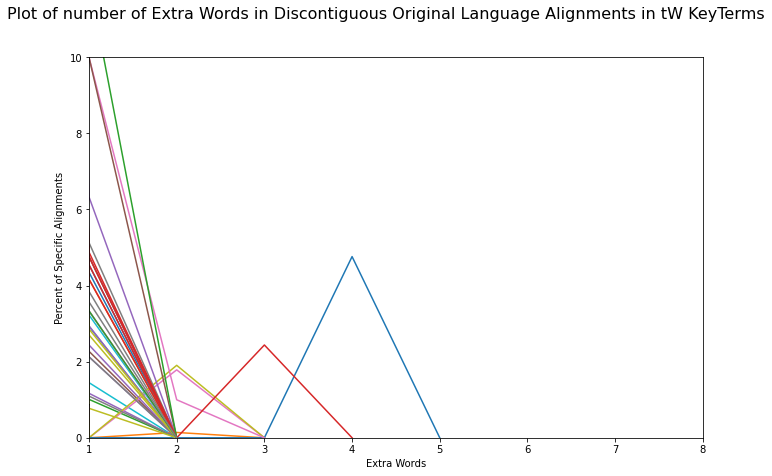

In [10]:
field = 'origWordsBetween'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Extra Words in Discontiguous Original Language Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Extra Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True, xlimit=[1, 8], ylimit=[0,10])

##### Notes:
- this field analysis suggests that most original language alignments probably good. Probably the cases of a word between aligned words should be reviewed.
<p></p>

#### Analysis of count of extra unaligned words between aligned target language words:

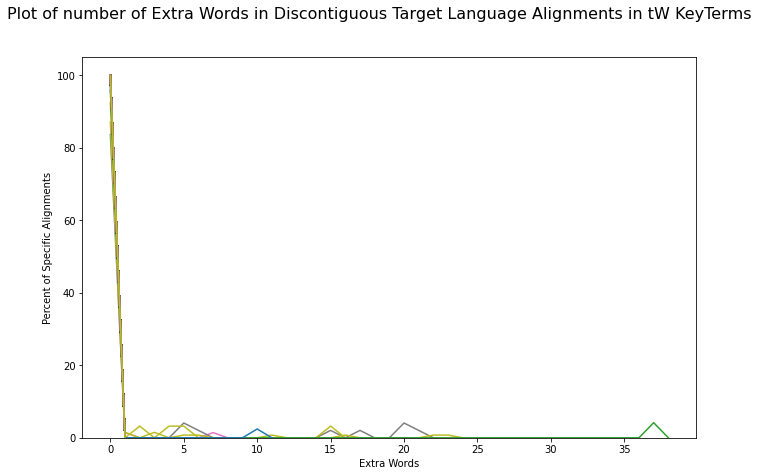

In [11]:
field = 'targetWordsBetween'
field_frequencies, stats = db.getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, field, sortIndex = True)
filledFrequencies = db.zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Extra Words in Discontiguous Target Language Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Extra Words"
plot.plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that most target language alignments are very tight.

In [12]:
print(f"Testing tWords {type_} with minimum of {minAlignments} alignments")

thresholds = {
    'alignmentOrigWordsThreshold': 3,
    'alignmentTargetWordsThreshold': 5,
    'origWordsBetweenThreshold': 1,
    'targetWordsBetweenThreshold': 1,
    'alignmentFrequencyMinThreshold': 5
}

warningData,summary = db.generateWarningsAndSummary(baseDataPath, type_, bibleType, testamentStr, filteredAlignmentsForWord,
                                                     thresholds, tag=f'{minAlignments}')
print(f"Found {len(warningData)} alignments to check - min threshold {minAlignments}")

Testing tWords all with minimum of 20 alignments
saved summary of 429 original words to ./data/en/ult/all_en_ult_NT_summary_20.csv
Found 1410 alignments to check - min threshold 20
